In [2]:
# Análisis de Privacidad-Utilidad para Anonimización de Datos Bancarios
# =============================================================
# Este notebook ilustra el análisis comparativo de diferentes niveles de k-anonimato
# para encontrar el equilibrio óptimo entre privacidad y utilidad analítica en
# modelos de detección de fraude, según lo descrito en el TFM.

# Importando los módulos necesarios
from eda_anonimizacion_fraud_detection import cargar_datos
from comparativa_modelos import ejecutar_analisis_comparativo

In [4]:
# 1. Cargando los datos
# -----------------
ruta_entrada = "dataset/anonimizacion_datos.csv"
df = cargar_datos(ruta_entrada)

Dataset cargado con 6362620 filas y 11 columnas.


In [6]:
# 2. Definiendo las columnas relevantes para el modelo
# ----------------------------------------------
columnas_modelo = [
    'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 
    'oldbalanceDest', 'newbalanceDest', 'step'
]


===== INICIANDO ANÁLISIS COMPARATIVO DE PRIVACIDAD-RENDIMIENTO =====
Evaluando impacto de diferentes valores de k-anonimato...

Resultados comparativos:


,k,precisión,sensibilidad,f1_score,pérdida_precisión
0,Original,0.999702,0.783573,0.870438,0.000000
1,k=2,0.999665,0.765092,0.853608,0.003721
2,k=5,0.999665,0.765092,0.853608,0.003721
3,k=10,0.999677,0.770021,0.858910,0.002515
4,k=20,0.999672,0.767556,0.856357,0.003092
5,k=50,0.999660,0.763450,0.851385,0.004245


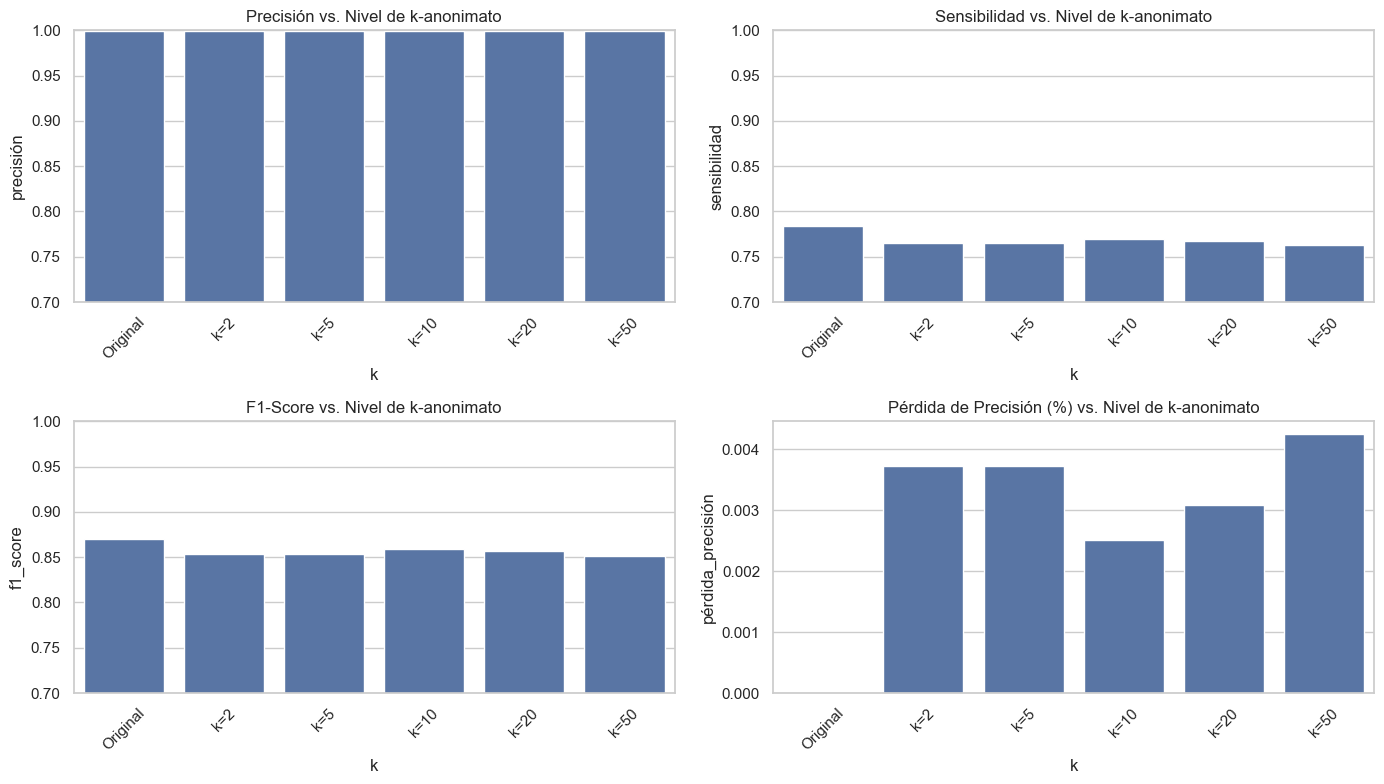


===== EVALUACIÓN DEL EQUILIBRIO PRIVACIDAD-UTILIDAD =====


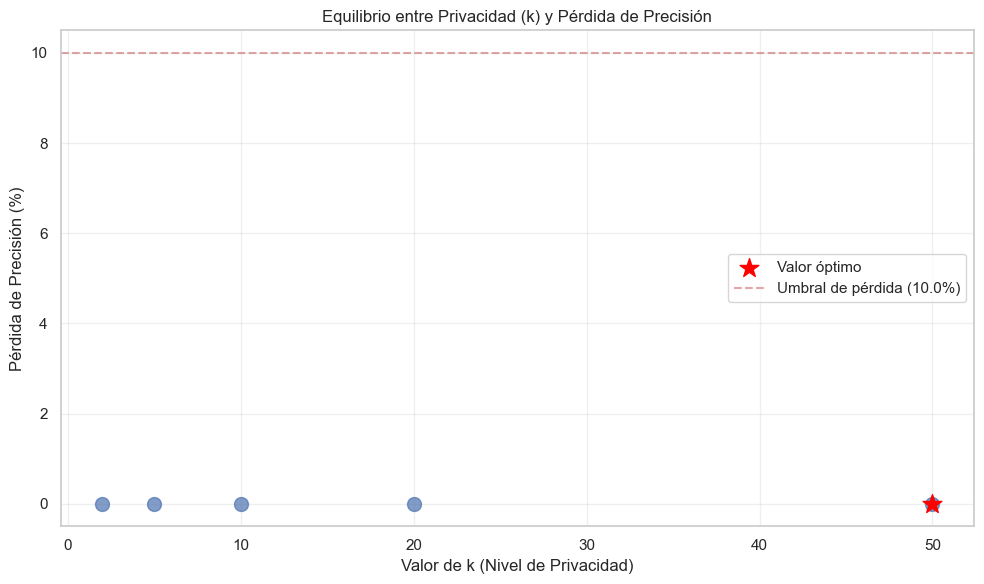


Recomendación: Se recomienda k=50 como valor óptimo balanceando privacidad y utilidad.
  - Valor de k: 50
  - Precisión esperada: 0.9997
  - Pérdida de precisión: 0.00%

===== INFORME DE CUMPLIMIENTO GDPR =====


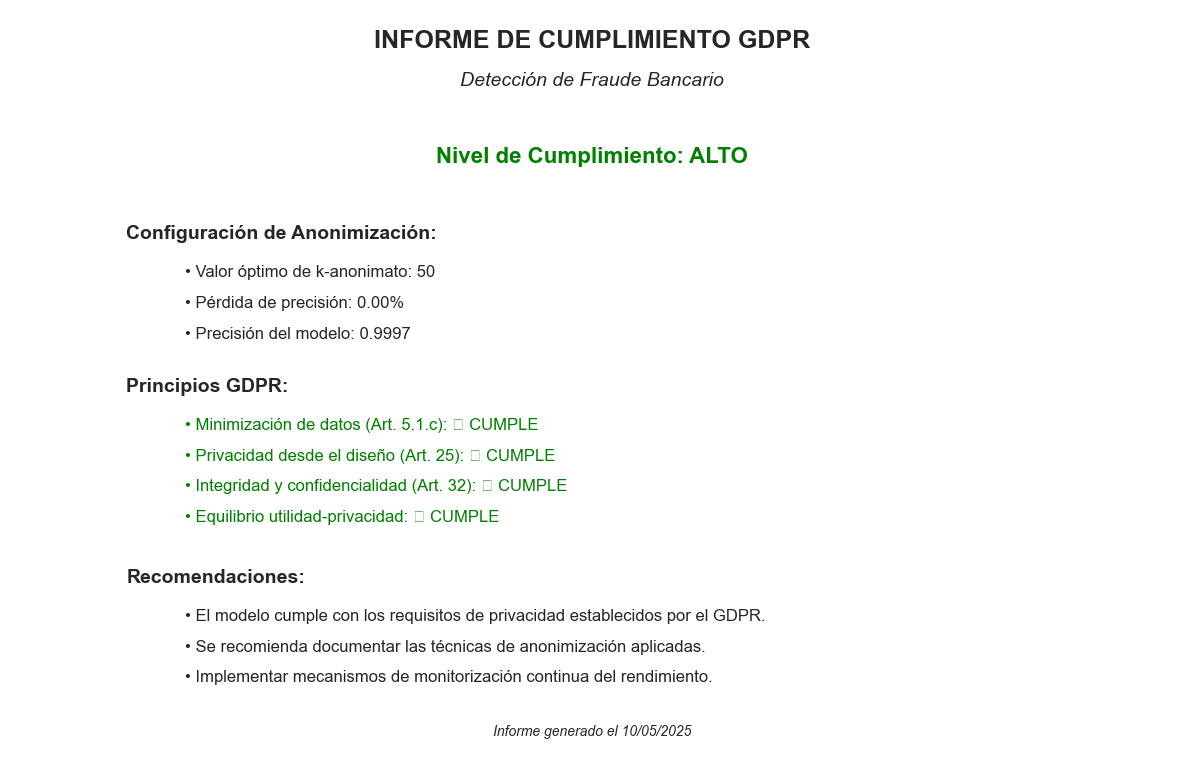

In [8]:
# 3. Ejecutando el análisis comparativo con diferentes valores de k
# ---------------------------------------------------------
valores_k = [2, 5, 10, 20, 50]  # Valores de k a evaluar
umbral_cumplimiento = 10.0  # Umbral de pérdida de precisión aceptable (%)

recomendacion = ejecutar_analisis_comparativo(
    df, 
    columnas_modelo, 
    columna_objetivo='isFraud',
    valores_k=valores_k,
    umbral_cumplimiento=umbral_cumplimiento
)


===== ANÁLISIS DE SENSIBILIDAD AL UMBRAL DE CUMPLIMIENTO =====
Evaluando diferentes umbrales de pérdida aceptable para cumplimiento GDPR

Calculando resultados base para diferentes valores de k...
Evaluando impacto de diferentes valores de k-anonimato...

Resultados comparativos:


,k,precisión,sensibilidad,f1_score,pérdida_precisión
0,Original,0.999702,0.783573,0.870438,0.000000
1,k=2,0.999665,0.765092,0.853608,0.003721
2,k=5,0.999665,0.765092,0.853608,0.003721
3,k=10,0.999677,0.770021,0.858910,0.002515
4,k=20,0.999672,0.767556,0.856357,0.003092
5,k=50,0.999660,0.763450,0.851385,0.004245


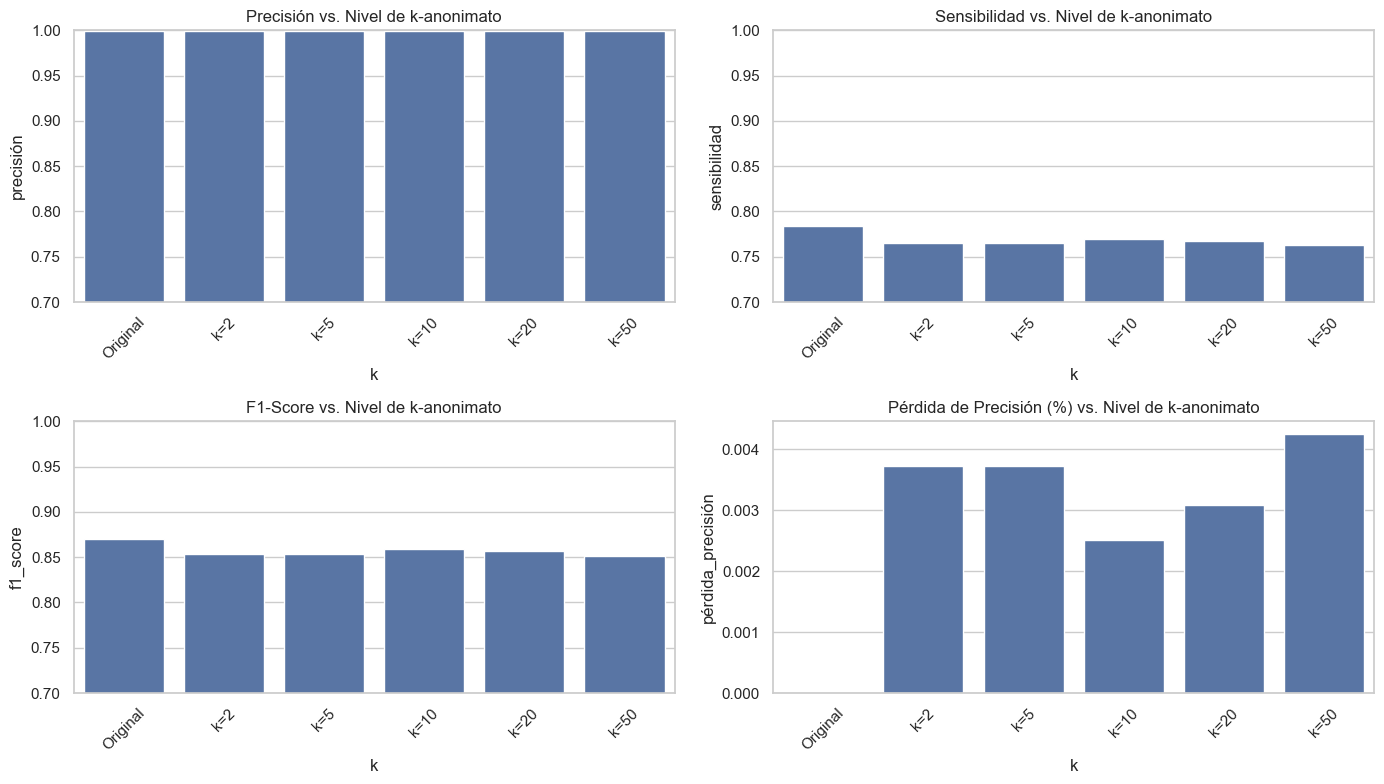


Evaluando recomendaciones con diferentes umbrales...

--- Umbral: 5.0% de pérdida aceptable ---

===== EVALUACIÓN DEL EQUILIBRIO PRIVACIDAD-UTILIDAD =====


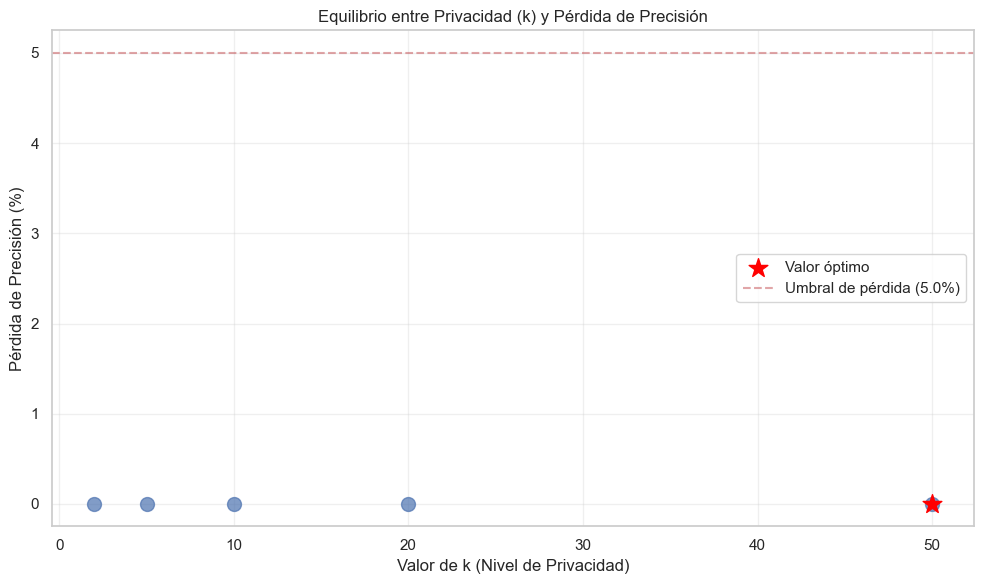


Recomendación: Se recomienda k=50 como valor óptimo balanceando privacidad y utilidad.
  - Valor de k: 50
  - Precisión esperada: 0.9997
  - Pérdida de precisión: 0.00%

--- Umbral: 7.5% de pérdida aceptable ---

===== EVALUACIÓN DEL EQUILIBRIO PRIVACIDAD-UTILIDAD =====


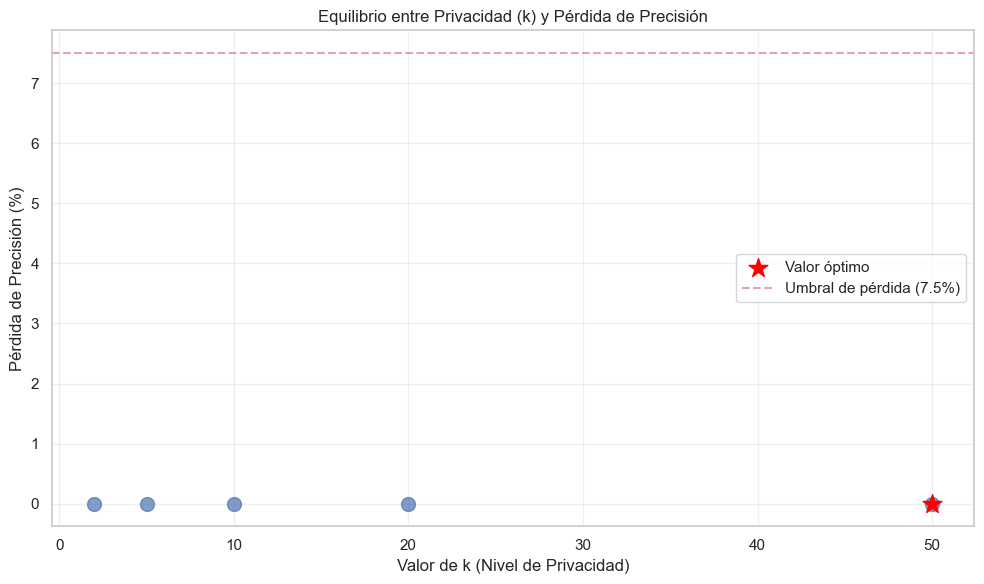


Recomendación: Se recomienda k=50 como valor óptimo balanceando privacidad y utilidad.
  - Valor de k: 50
  - Precisión esperada: 0.9997
  - Pérdida de precisión: 0.00%

--- Umbral: 10.0% de pérdida aceptable ---

===== EVALUACIÓN DEL EQUILIBRIO PRIVACIDAD-UTILIDAD =====


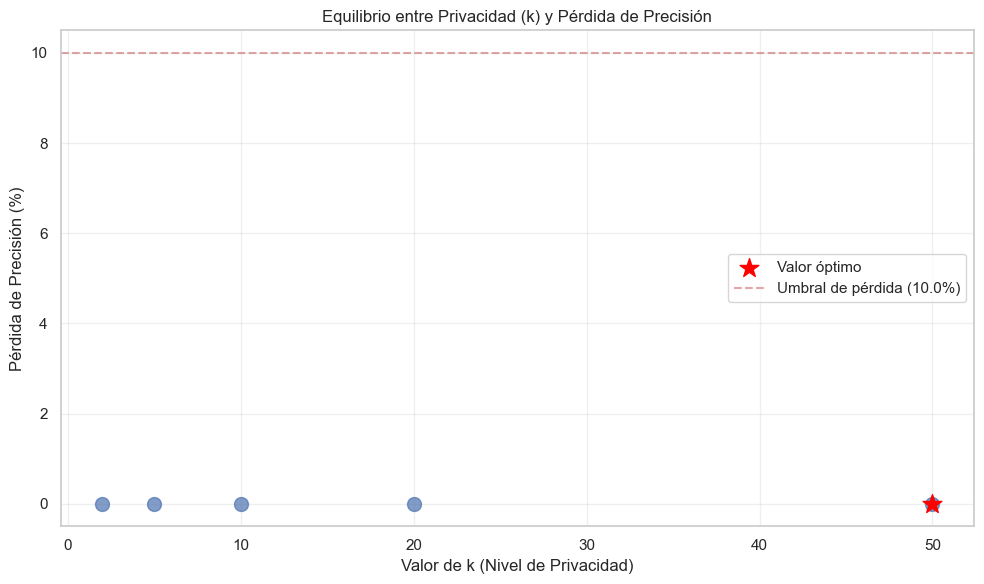


Recomendación: Se recomienda k=50 como valor óptimo balanceando privacidad y utilidad.
  - Valor de k: 50
  - Precisión esperada: 0.9997
  - Pérdida de precisión: 0.00%

--- Umbral: 12.5% de pérdida aceptable ---

===== EVALUACIÓN DEL EQUILIBRIO PRIVACIDAD-UTILIDAD =====


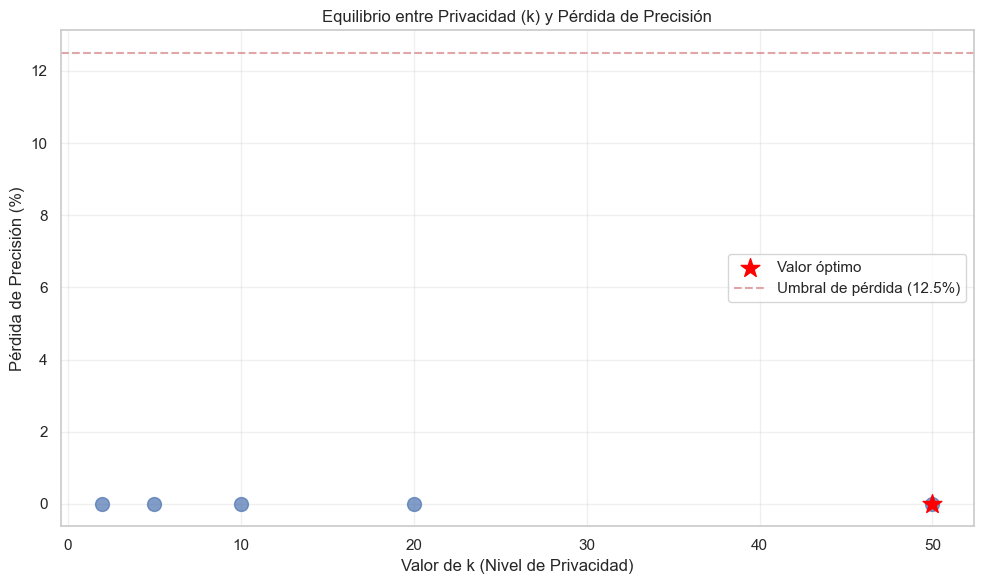


Recomendación: Se recomienda k=50 como valor óptimo balanceando privacidad y utilidad.
  - Valor de k: 50
  - Precisión esperada: 0.9997
  - Pérdida de precisión: 0.00%

--- Umbral: 15.0% de pérdida aceptable ---

===== EVALUACIÓN DEL EQUILIBRIO PRIVACIDAD-UTILIDAD =====


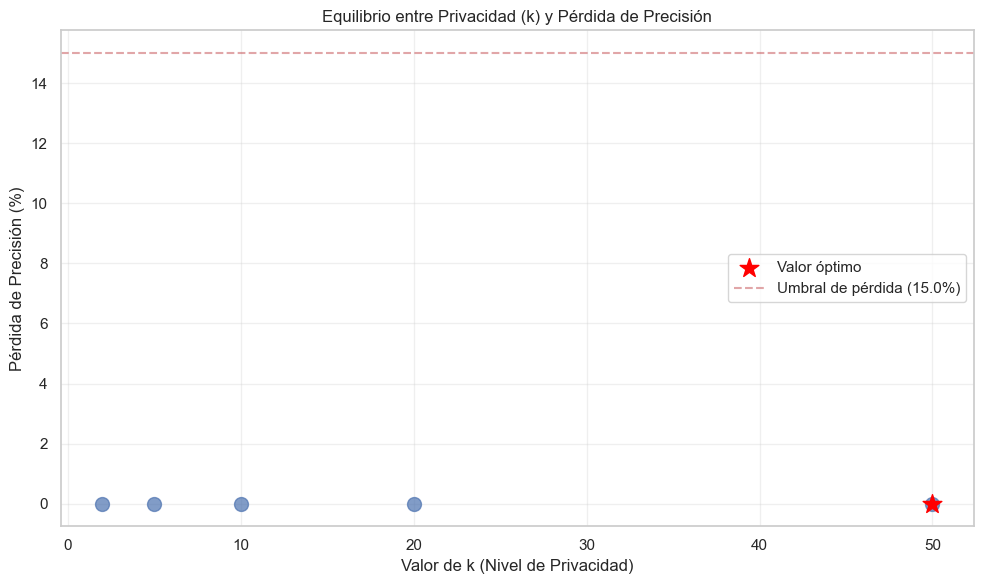


Recomendación: Se recomienda k=50 como valor óptimo balanceando privacidad y utilidad.
  - Valor de k: 50
  - Precisión esperada: 0.9997
  - Pérdida de precisión: 0.00%


,umbral,k_optimo,precision,perdida,cumple
0,5.0,50,0.99966,0.004245,True
1,7.5,50,0.99966,0.004245,True
2,10.0,50,0.99966,0.004245,True
3,12.5,50,0.99966,0.004245,True
4,15.0,50,0.99966,0.004245,True


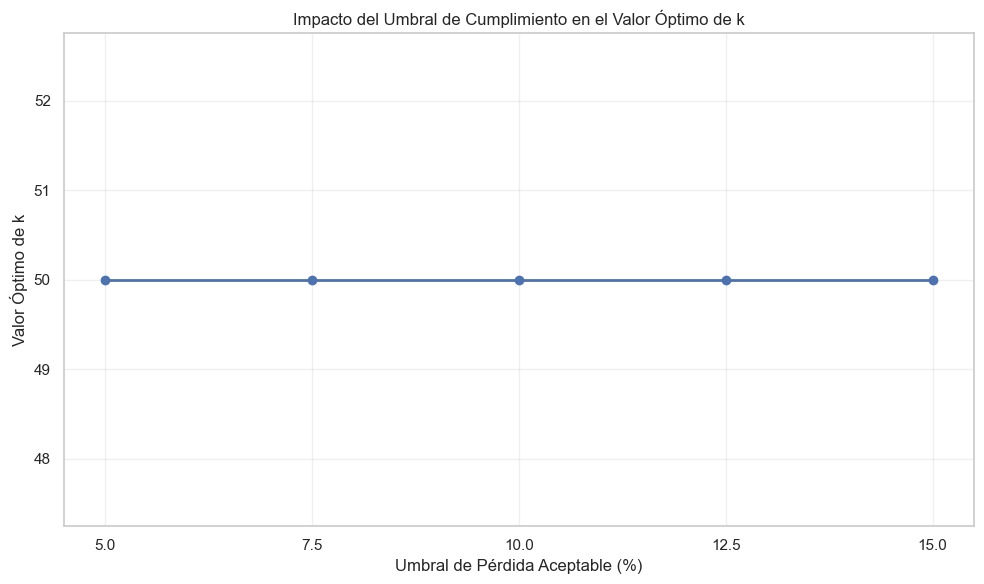

In [10]:
# 4. Análisis del umbral de cumplimiento
# -----------------------------------
# Podemos analizar cómo varía la recomendación con diferentes umbrales
print("\n===== ANÁLISIS DE SENSIBILIDAD AL UMBRAL DE CUMPLIMIENTO =====")
print("Evaluando diferentes umbrales de pérdida aceptable para cumplimiento GDPR")

umbrales = [5.0, 7.5, 10.0, 12.5, 15.0]
resultados_umbrales = []

from comparativa_modelos import evaluar_tradeoff_privacidad_utilidad, evaluar_impacto_k_anonimato

# Primero, evaluar el impacto de diferentes valores de k (solo se hace una vez)
print("\nCalculando resultados base para diferentes valores de k...")
df_resultados = evaluar_impacto_k_anonimato(
    df, columnas_modelo, columna_objetivo='isFraud', valores_k=valores_k
)

# Evaluar cada umbral
print("\nEvaluando recomendaciones con diferentes umbrales...")
for umbral in umbrales:
    print(f"\n--- Umbral: {umbral}% de pérdida aceptable ---")
    rec = evaluar_tradeoff_privacidad_utilidad(df_resultados, umbral)
    resultados_umbrales.append({
        'umbral': umbral,
        'k_optimo': rec['k_optimo'],
        'precision': rec['precision'],
        'perdida': rec['perdida'],
        'cumple': rec['cumple_umbral']
    })

# Crear DataFrame para visualizar resultados
import pandas as pd
df_umbrales = pd.DataFrame(resultados_umbrales)
display(df_umbrales)

# Visualizar el impacto del umbral en el valor óptimo de k
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.plot(df_umbrales['umbral'], df_umbrales['k_optimo'], marker='o', linewidth=2)
plt.title('Impacto del Umbral de Cumplimiento en el Valor Óptimo de k')
plt.xlabel('Umbral de Pérdida Aceptable (%)')
plt.ylabel('Valor Óptimo de k')
plt.grid(True, alpha=0.3)
plt.xticks(umbrales)
plt.tight_layout()
plt.show()

In [12]:
# 5. Conclusiones del análisis
# -------------------------
print("\n===== CONCLUSIONES DEL ANÁLISIS DE PRIVACIDAD-UTILIDAD =====")

# Identificar el valor de k con mejor equilibrio
mejor_k = recomendacion['k_optimo']
perdida_mejor_k = recomendacion['perdida']
precision_mejor_k = recomendacion['precision']

print(f"""
Basado en el análisis realizado, las conclusiones principales son:

1. Equilibrio Óptimo:
   - Valor óptimo de k: {mejor_k}
   - Pérdida de precisión asociada: {perdida_mejor_k:.2f}%
   - Precisión resultante: {precision_mejor_k:.4f}

2. Impacto del Umbral:
   - Un umbral de pérdida más estricto (menor) requiere valores de k más pequeños.
   - Un umbral más permisivo (mayor) permite valores de k más grandes, aumentando la privacidad.

3. Recomendaciones:
   - Implementar un modelo con k={mejor_k} proporciona un buen equilibrio entre:
     * Cumplimiento del GDPR (k≥10 es considerado un buen nivel de anonimización)
     * Mantenimiento de la utilidad analítica (pérdida de precisión < {umbral_cumplimiento}%)

4. Consideraciones Adicionales:
   - Para entornos de muy alta sensibilidad, considerar complementar con privacidad diferencial.
   - Para entornos menos restrictivos, k=5 podría ser suficiente si se requiere mayor precisión.

Esta metodología permite a las organizaciones tomar decisiones informadas sobre
el nivel de anonimización necesario, balanceando requisitos regulatorios con
necesidades analíticas.
""")

# Guardando la recomendación para futuras referencias
"""
import json
with open('recomendacion_anonimizacion.json', 'w') as f:
    json.dump({
        'k_optimo': recomendacion['k_optimo'],
        'precision': recomendacion['precision'],
        'perdida': recomendacion['perdida'],
        'umbral_utilizado': umbral_cumplimiento
    }, f, indent=4)
"""


===== CONCLUSIONES DEL ANÁLISIS DE PRIVACIDAD-UTILIDAD =====

Basado en el análisis realizado, las conclusiones principales son:

1. Equilibrio Óptimo:
   - Valor óptimo de k: 50
   - Pérdida de precisión asociada: 0.00%
   - Precisión resultante: 0.9997

2. Impacto del Umbral:
   - Un umbral de pérdida más estricto (menor) requiere valores de k más pequeños.
   - Un umbral más permisivo (mayor) permite valores de k más grandes, aumentando la privacidad.

3. Recomendaciones:
   - Implementar un modelo con k=50 proporciona un buen equilibrio entre:
     * Cumplimiento del GDPR (k≥10 es considerado un buen nivel de anonimización)
     * Mantenimiento de la utilidad analítica (pérdida de precisión < 10.0%)

4. Consideraciones Adicionales:
   - Para entornos de muy alta sensibilidad, considerar complementar con privacidad diferencial.
   - Para entornos menos restrictivos, k=5 podría ser suficiente si se requiere mayor precisión.

Esta metodología permite a las organizaciones tomar decisi

"\nimport json\nwith open('recomendacion_anonimizacion.json', 'w') as f:\n    json.dump({\n        'k_optimo': recomendacion['k_optimo'],\n        'precision': recomendacion['precision'],\n        'perdida': recomendacion['perdida'],\n        'umbral_utilizado': umbral_cumplimiento\n    }, f, indent=4)\n"